<a href="https://colab.research.google.com/github/AMANVISHWAKARMA27/Machine-Learning-Models/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset From Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# !mkdir -p /root/.kaggle
# !cp kaggle.json /root/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
kaggle datasets download -d teertha/ushealthinsurancedataset

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 24.8MB/s]


In [ ]:
import zipfile
zipref=zipfile.ZipFile("/content/ushealthinsurancedataset.zip",'r')
zipref.extractall('/content')
zipref.close()

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

# PUBLIC😎
***Let's start EDA..***

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# insurance_dataset.age.value_counts()
insurance_dataset.smoker.value_counts()
# insurance_dataset.children.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Categorical Features:
- Sex
- Smoker
- Region

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Encoding The dataset

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


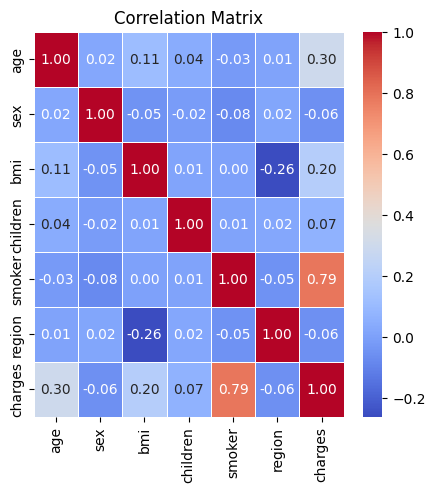

In [ ]:
# Generate a correlation matrix
correlation_matrix = insurance_dataset.corr()
color_palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, cmap=color_palette, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

<ipython-input-75-001fa0426508>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


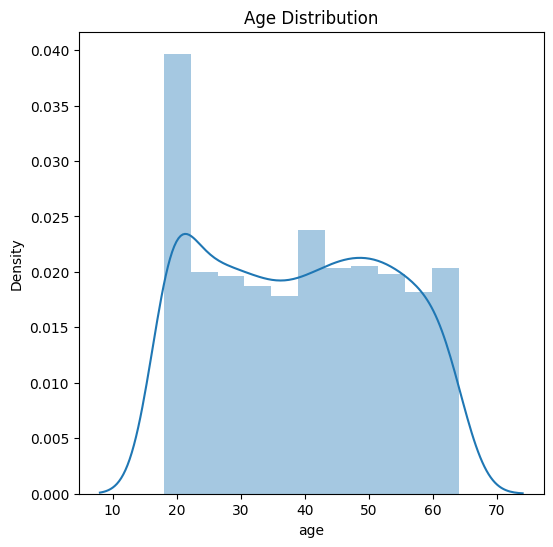

In [ ]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

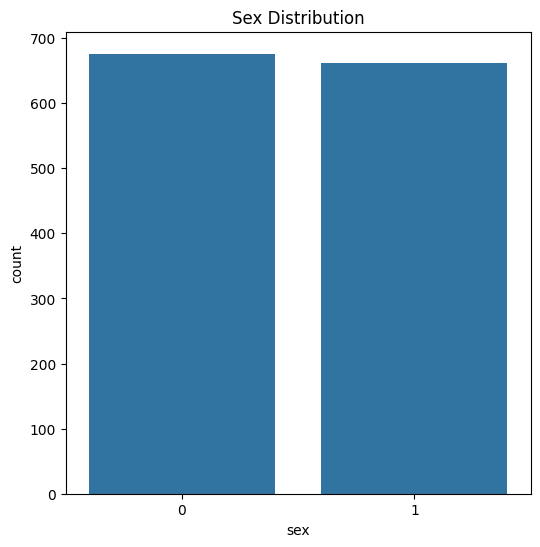

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

<ipython-input-78-81b69896b0d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


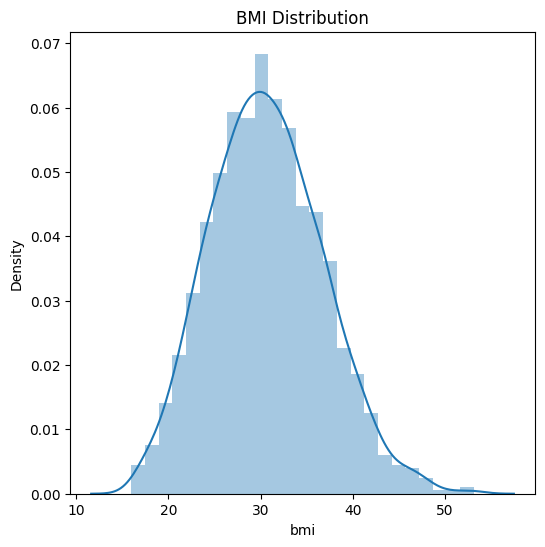

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

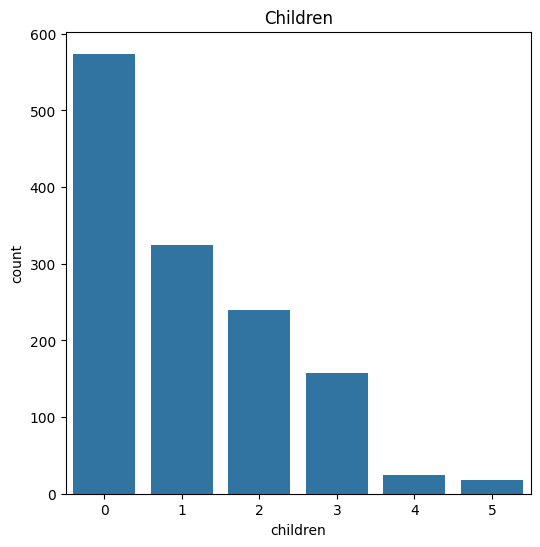

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

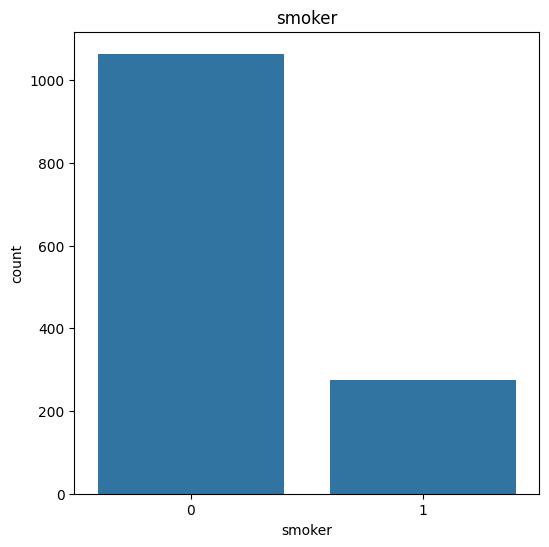

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

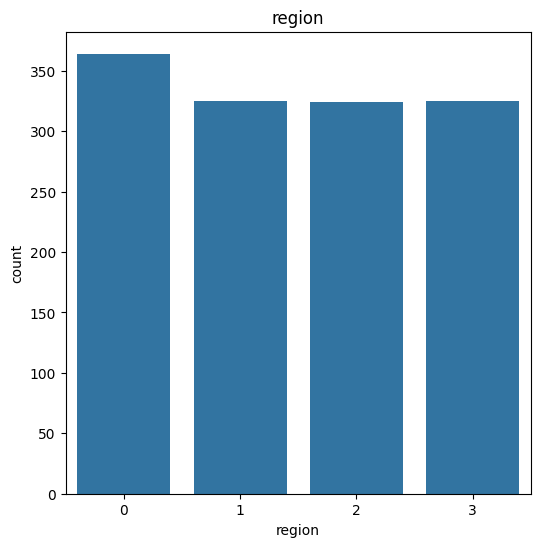

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

<ipython-input-28-a2fe9b394a51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


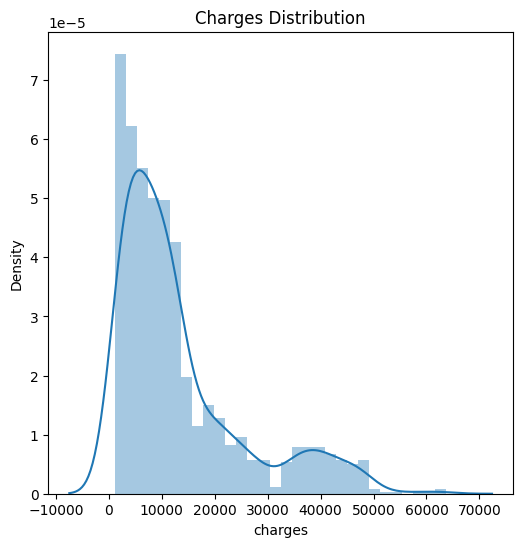

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

ValueError: continuous is not supported

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared valUe : ', r2_train)

R squared valUe :  0.751505643411174


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared valUe : ', r2_test)

R squared valUe :  0.7447273869684076


Logistic Regression..


In [ ]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()

In [ ]:
log_regressor.fit(X_train, Y_train)

ValueError: Unknown label type: 'continuous'

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# loading the Decision Tree model
dt_regressor = DecisionTreeRegressor()

# fitting the model
dt_regressor.fit(X_train, Y_train)

# prediction on training data
dt_training_data_prediction = dt_regressor.predict(X_train)

# R squared value
r2_dt_train = metrics.r2_score(Y_train, dt_training_data_prediction)
print('Decision Tree R squared value: ', r2_dt_train)


Decision Tree R squared value:  1.0


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# loading the Random Forest model
rf_regressor = RandomForestRegressor()

# fitting the model
rf_regressor.fit(X_train, Y_train)

# prediction on training data
rf_training_data_prediction = rf_regressor.predict(X_train)

# R squared value
r2_rf_train = metrics.r2_score(Y_train, rf_training_data_prediction)
print('Random Forest R squared value: ', r2_rf_train)


Random Forest R squared value:  0.9772883470531506


SVR

In [ ]:
from sklearn.svm import SVR

# loading the SVM model
svm_regressor = SVR()

# fitting the model
svm_regressor.fit(X_train, Y_train)

# prediction on training data
svm_training_data_prediction = svm_regressor.predict(X_train)

# R squared value
r2_svm_train = metrics.r2_score(Y_train, svm_training_data_prediction)
print('SVM R squared value: ', r2_svm_train)


SVM R squared value:  -0.11104564904956948


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Define the Decision Tree model
decision_tree = DecisionTreeRegressor()

# Define hyperparameters to search over for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Decision Tree
grid_search = GridSearchCV(decision_tree, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Evaluate and print the results
best_decision_tree = grid_search.best_estimator_
y_pred = best_decision_tree.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

print("Results for Decision Tree:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Results for Decision Tree:
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error on Test Set: 19636372.49


# Checking for the best model for a given dataset

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd


# Define the models and their respective hyperparameters for GridSearchCV
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define hyperparameters to search over for each model
param_grids = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
}

# Perform GridSearchCV for each model
results = {}
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, Y_train)
    results[model_name] = grid_search

# Evaluate and print the results
print("\nResults:")
for model_name, grid_search_result in results.items():
    best_model = grid_search_result.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    print(f"\n{model_name}:")
    print(f"Best Hyperparameters: {grid_search_result.best_params_}")
    print(f"Mean Squared Error on Test Set: {mse:.2f}")

# You can access the best model for each type using results[model_name].best_estimator_


Performing GridSearchCV for Linear Regression...
Performing GridSearchCV for Ridge...
Performing GridSearchCV for Lasso...
Performing GridSearchCV for Decision Tree...
Performing GridSearchCV for Random Forest...

Results:

Linear Regression:
Best Hyperparameters: {}
Mean Squared Error on Test Set: 38337035.49

Ridge:
Best Hyperparameters: {'alpha': 0.01}
Mean Squared Error on Test Set: 38336894.39

Lasso:
Best Hyperparameters: {'alpha': 1.0}
Mean Squared Error on Test Set: 38337462.37

Decision Tree:
Best Hyperparameters: {'max_depth': 5}
Mean Squared Error on Test Set: 21255528.87

Random Forest:
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 200}
Mean Squared Error on Test Set: 20606273.89
